In [54]:
! pip install keras==2.2.4


In [55]:
! pip install tensorflow

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [57]:
from keras.preprocessing.image import ImageDataGenerator

In [58]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [59]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_7f3b8564849846ea98aa30c2ae3140ed = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_7f3b8564849846ea98aa30c2ae3140ed = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_7f3b8564849846ea98aa30c2ae3140ed = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='n2F9SEJ0m2Kfa95hTRE1MVN8UCLt_CTrsv3CwqOIV_UV',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_7f3b8564849846ea98aa30c2ae3140ed)

streaming_body_1 = client_7f3b8564849846ea98aa30c2ae3140ed.get_object(Bucket='ecg-donotdelete-pr-sf0uhtn4ulcuwz', Key='ecg.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [60]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [61]:
import os
filename=os.listdir('/home/wsuser/work/ecg/train')

In [127]:
x_train=train_datagen.flow_from_directory("/home/wsuser/work/ecg/train", color_mode = "grayscale",target_size=(64,64),batch_size=32,class_mode="categorical")
x_test=test_datagen.flow_from_directory("/home/wsuser/work/ecg/test",color_mode = "grayscale",
                                          target_size=(64,64),batch_size=32,class_mode="categorical")

Found 192 images belonging to 6 classes.
Found 192 images belonging to 6 classes.


In [128]:
print(x_train.class_indices)

{'Left Bundle Branch Block1': 0, 'Normal1': 1, 'Premature Atrial Contraction1': 2, 'Premature Ventricular Contractions1': 3, 'Right Bundle Branch Block1': 4, 'Ventricular Fibrillation1': 5}


In [129]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=6,activation="softmax"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 184518    
Total params: 184,838
Trainable params: 184,838
Non-trainable params: 0
_________________________________________________________________


In [130]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [131]:
model.fit(x_train,epochs=20,validation_data=x_test)

Epoch 1/20
6/6 [==============================] - 2s 264ms/step - loss: 2.6282 - accuracy: 0.1504 - val_loss: 2.6592 - val_accuracy: 0.1667
Epoch 2/20
6/6 [==============================] - 1s 200ms/step - loss: 2.4553 - accuracy: 0.1885 - val_loss: 1.9975 - val_accuracy: 0.1667
Epoch 3/20
6/6 [==============================] - 1s 176ms/step - loss: 1.9930 - accuracy: 0.1584 - val_loss: 1.7680 - val_accuracy: 0.1667
Epoch 4/20
6/6 [==============================] - 1s 184ms/step - loss: 1.7281 - accuracy: 0.2403 - val_loss: 1.6841 - val_accuracy: 0.3958
Epoch 5/20
6/6 [==============================] - 1s 172ms/step - loss: 1.6811 - accuracy: 0.3750 - val_loss: 1.6164 - val_accuracy: 0.4479
Epoch 6/20
6/6 [==============================] - 1s 184ms/step - loss: 1.6345 - accuracy: 0.3713 - val_loss: 1.5711 - val_accuracy: 0.4844
Epoch 7/20
6/6 [==============================] - 1s 180ms/step - loss: 1.5862 - accuracy: 0.5354 - val_loss: 1.5029 - val_accuracy: 0.7188
Epoch 8/20
6/6 [====

In [132]:
model.save("heart.h5")

In [133]:
!tar -zcvf Heart_Disease_Detection_model.tgz heart.h5

heart.h5


In [134]:
ls -1

ecg/
Heart_Disease_Detection_model.tgz
heart.h5


In [135]:
!pip install watson-machine-learning-client --upgrade

In [136]:
!pip install --upgrade "ibm-watson>=5.2.3"

In [137]:
from ibm_watson_machine_learning import APIClient
wml_credentials={"url":"https://us-south.ml.cloud.ibm.com", "apikey": "rQxVW57Y2_Ir60XW_4p_ak6yWMysixC6odvIxayBrjdi"}
client=APIClient(wml_credentials)

In [138]:
def guide_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources']if item['entity']["name"]==space_name)['metadata']['id'])

In [139]:
space_uid=guide_from_space_name(client,'Disease_classification')
print("Space UID =" + space_uid)

Space UID =11f98051-1903-4786-8bfb-253b1fb9d1cd


In [140]:
client.set.default_space(space_uid)

'SUCCESS'

In [141]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [142]:
software_spec_uid=client.software_specifications.get_uid_by_name("tensorflow_1.15-py3.6")
software_spec_uid

'2b73a275-7cbf-420b-a912-eae7f436e0bc'

In [143]:
!pip install watson-machine-learning-client

In [144]:
model_details=client.repository.store_model(model='Heart_Disease_Detection_model.tgz',meta_props={client.repository.ModelMetaNames.NAME:"CNN",client.repository.ModelMetaNames.TYPE:"keras_2.2.4",client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid})
model_id=client.repository.get_model_uid(model_details)

Note: Warnings!! :  Model type keras_2.2.4 is deprecated. We recommend you use a supported model type. See Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [145]:
model_id

'7f98380d-2664-49ba-8584-12963824252e'

In [146]:
from keras.preprocessing import image
from tensorflow.keras.models import load_model

In [147]:

streaming_body_2 = client_7f3b8564849846ea98aa30c2ae3140ed.get_object(Bucket='ecg-donotdelete-pr-sf0uhtn4ulcuwz', Key='fig_5655.png')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


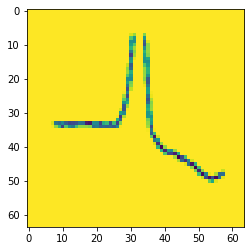

In [148]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
imgo=Image.open(streaming_body_2)
newsize=(64,64)
im1=imgo.resize(newsize)
im_array=np.asarray(im1)
plt.imshow(im_array)
plt.show()

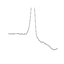

In [149]:
im1

In [150]:
x=image.img_to_array(im1)
print(x.shape)

(64, 64, 1)


In [151]:
x=np.expand_dims(x,axis=0)
print(x.shape)

(1, 64, 64, 1)


In [152]:
y=model.predict(x)
pred=np.argmax(y, axis=1)

In [153]:
print(pred)

[3]


In [154]:
print(y)

[[0.0000000e+00 0.0000000e+00 2.9429204e-31 1.0000000e+00 0.0000000e+00
  0.0000000e+00]]
